In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


In [48]:
df = pd.read_csv("../Data/International_Education_Costs.csv")
df[df["University"] == "University of Washington"]
df.shape

(907, 12)

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

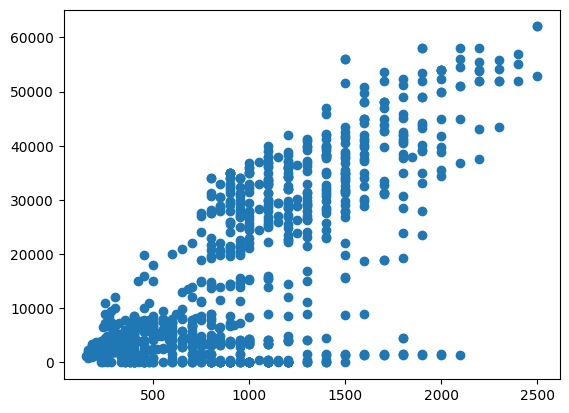

In [27]:
plt.scatter(df['Rent_USD'], df['Tuition_USD'])

In [28]:
categorical_cols = ['Country', 'City', 'University', 'Program', 'Level']
numerical_cols = ['Duration_Years', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']
X = df[categorical_cols + numerical_cols]
y = df['Tuition_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Duration_Years',
                                                   'Living_Cost_Index',
                                                   'Rent_USD', 'Visa_Fee_USD',
                                                   'Insurance_USD',
                                                   'Exchange_Rate']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'City',
                                                   'University', 'Program',
                                                   'Level'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

MAE: 1940.0978021978024
RMSE: 3333.447736351811
R-squared: 0.9574036553618656


In [38]:
joblib.dump(model, '../model/model.joblib')

['../model/model.joblib']